In [1]:
import os
import time
import pickle
import codecs
import matplotlib

import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [2]:
results = ["avg", "min", "max", "concat"]
sgm = {}
eam = {}

In [3]:
for method in results:
    with codecs.open('results_'+str(method)+'/skipgram.pkl', 'rb') as s:
        sgm[method] = pickle.load(s)
    with codecs.open('results_'+str(method)+'/embed_align.pkl', 'rb') as e:
        eam[method] = pickle.load(e)

In [4]:
def splitting(model_dict):
    STS = {}
    ClassificationTask = {}
    STS_updated_dict = {}
    
    # splitting
    for key, value in model_dict.items():
        for task, scores in value.items():
            if task.find("STS") == 0 or task.find("Relatedness") > 0:
                STS[key, task] = model_dict[key][task]
            else:
                ClassificationTask[key, task] = model_dict[key][task]
    
    
    for key, subtasks in STS.items():
        for sets, scores in subtasks.items():
            if sets == 'pearson':
                STS_updated_dict[key] = {'pearson': scores * 100}
            try:
                if isinstance(scores['pearson'], dict):
#                     print((key, (scores['pearson']['mean'])))
                    STS_updated_dict[key] = {'pearson': scores['pearson']['mean'] * 100}
            except:
                continue
    
    
    # dataframes
    ClassificationTask_df = pd.DataFrame.from_dict(ClassificationTask, orient = 'index')
    ClassificationTask_df = ClassificationTask_df.drop(columns = ['ndev', 'ntest', 'devacc', 'f1'])
    
    STS_updated_df = pd.DataFrame.from_dict(STS_updated_dict, orient = 'index')
    
    return STS_updated_df, ClassificationTask_df

In [5]:
STS_sgm, ClassificationTask_sgm = splitting(sgm)
STS_eam, ClassificationTask_eam = splitting(eam)

In [6]:
pprint(STS_sgm)
pprint(STS_eam)

                          pearson
avg    SICKRelatedness  73.355836
       STS12            47.889392
       STS13            49.881236
       STS14            57.743089
       STS15            59.538726
       STS16            50.454545
       STSBenchmark     60.266904
concat STS14            60.011122
max    STS14            59.190883
min    STS14            59.638933
                pearson
avg    STS14  58.133807
concat STS14  60.707121
max    STS14  53.454594
min    STS14  54.791598


In [7]:
plt.rcParams['figure.figsize'] = [16, 12]

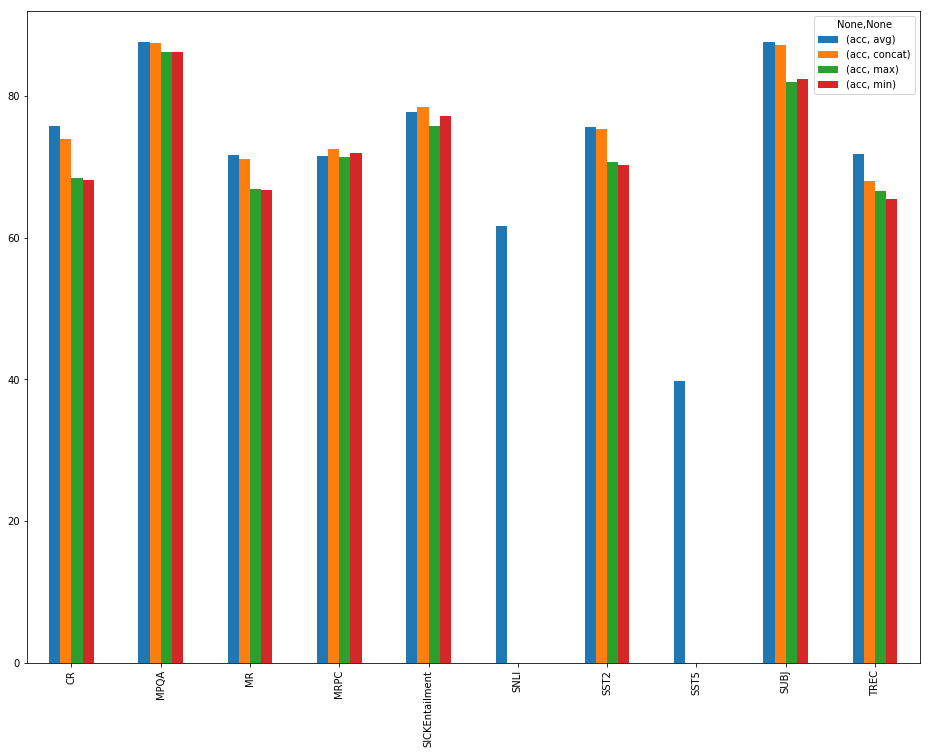

In [8]:
ClassificationTask_sgm.unstack(level=0).plot(kind='bar', subplots=False)
plt.show()

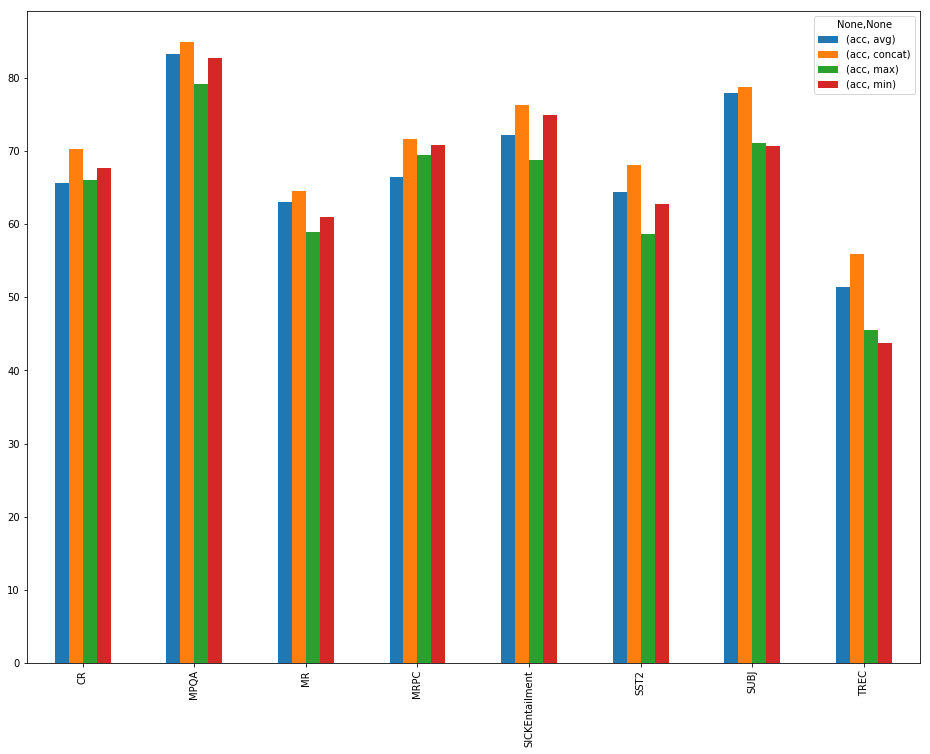

In [9]:
ClassificationTask_eam.unstack(level=0).plot(kind='bar', subplots=False)
plt.show()

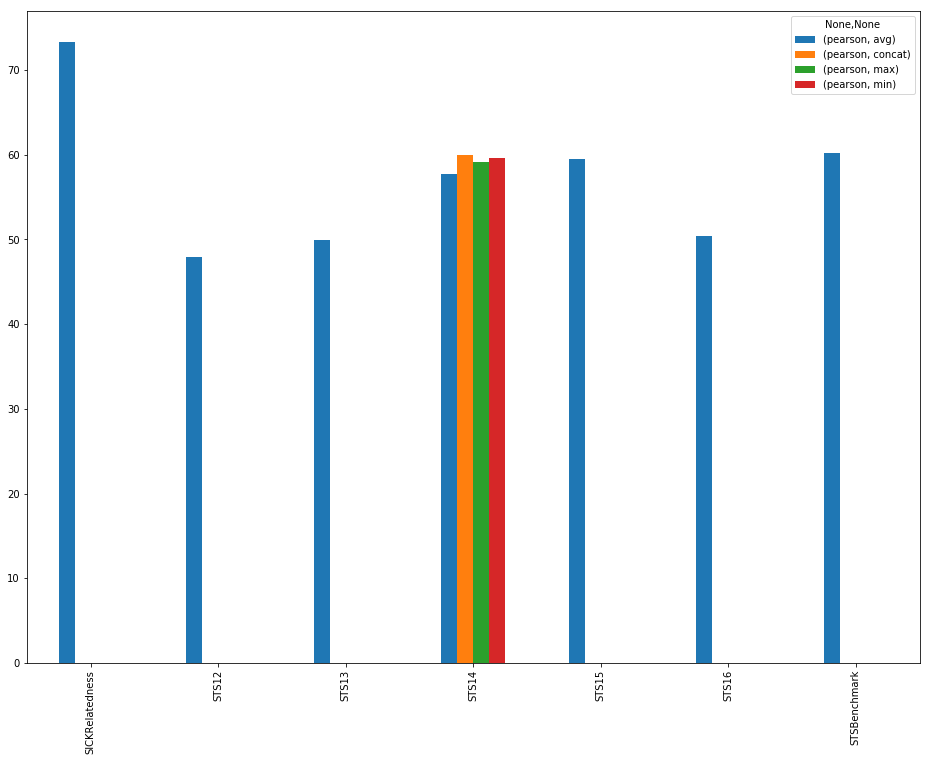

In [10]:
STS_sgm.unstack(level=0).plot(kind='bar', subplots=False)
plt.show()

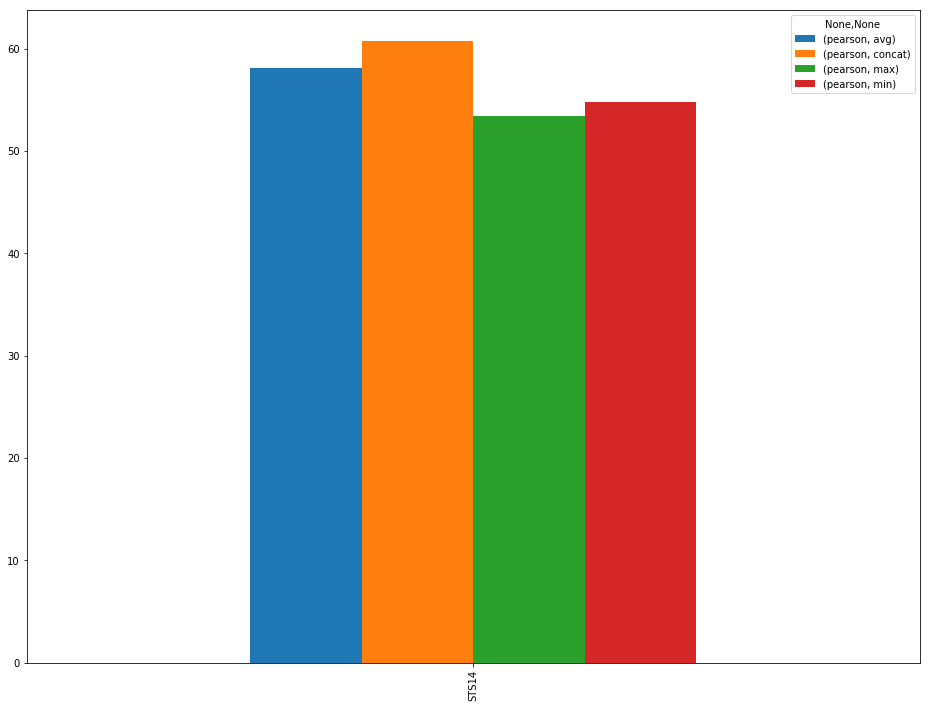

In [11]:
STS_eam.unstack(level=0).plot(kind='bar', subplots=False)
plt.show()